<a href="https://colab.research.google.com/github/KamranUmer/SentenceSimilarityUsingTransformer1/blob/main/SentenceSimilarityUsingTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=50022d6a18c5e1c8a285619c7c6c29fd504b0790aecb115cad150722b95999c8
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer('all-mpnet-base-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sentences = [
    "He's very happy",
    "He's extremely joyful",
    "He's very quiet",
    "He's extremely tired",
    "He's quite serious",
    "He's genuinely concerned",
    "He's thoroughly confused"

]

In [ ]:
print(sentences[0])


He's very happy


In [ ]:
embeddings = model.encode(sentences)
print(embeddings)

[[-0.01974075 -0.05180435 -0.01252424 ...  0.02222583 -0.00338981
  -0.01553367]
 [-0.00938564 -0.02828337 -0.01316692 ... -0.00411538 -0.00760967
  -0.02019168]
 [ 0.0146504   0.00374323 -0.01195084 ...  0.05231862 -0.05945095
   0.00901567]
 ...
 [ 0.05032453  0.0067604   0.00936915 ...  0.00259929  0.01242484
  -0.06346564]
 [ 0.01204531 -0.00887227 -0.01900241 ...  0.02128031 -0.04840055
  -0.02798184]
 [ 0.04704192 -0.0265594  -0.0382755  ...  0.00495753 -0.02523128
   0.02517639]]


In [ ]:
embeddings.shape

(7, 768)

In [ ]:
from sentence_transformers.util import cos_sim
score = cos_sim(embeddings[0],embeddings[1:])
score

tensor([[0.7685, 0.3426, 0.3938, 0.2817, 0.4741, 0.5159]])

<Axes: >

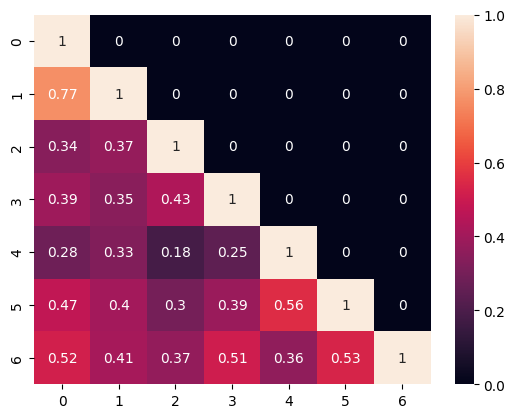

In [ ]:

import numpy as np

def sim_matrix(model):
    sim = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        sim[i:,i] = cos_sim(
            embeddings[i], embeddings[i:]
        )

    return sim

import matplotlib.pyplot as plt
import seaborn as sns

sim = sim_matrix(model)
sns.heatmap(sim, annot=True)


In [ ]:
sentences[score.argmax().item()]

"He's very happy"